### K-Nearest Neighbor Algorithmus:

#### Parameter:  

dataset = (X, Y)  
mit X := Features  
und Y := Classes  

K := Hyperparameter für die nächsten k Nachbarn  
sample := Neuer Datenpunkt zum Klassifizieren 

#### Pseudo-Code:

kNN (dataset, K, sample):  
  - Bestimme von jedem Punkt $p \in dataset$ die Distanz, mit der geg. Distanzfunktion.
  - Bestimme die $K$ nächst gelegenen Nachbarn und bestimme die zugehörige Klasse von $sample$.  

In [4]:
import numpy as np

def generate_dataset():
    cov = np.array([[1, 0], [0, 1]])
    data1 = np.random.multivariate_normal(np.array([0, 0]), cov, 10)
    data2 = np.random.multivariate_normal(np.array([-10, 4]), cov, 6)
    data3 = np.random.multivariate_normal(np.array([10, 10]), cov, 13)
    data = np.concatenate((data1, data2, data3), axis=0)
    classes = np.array([0 for i in range(10)] + [1 for i in range(6)] + [2 for i in range(13)])
    return data, classes

In [5]:
dataset, classes = generate_dataset()

In [6]:
print("Dataset and Classes!")
print(dataset)
print(classes)

Dataset and Classes!
[[  0.54990189   0.13762619]
 [ -0.17242602   2.11679261]
 [  0.93401262  -2.715281  ]
 [ -0.34403566  -1.31624774]
 [ -1.35446537   0.80374161]
 [  0.18324405  -1.22014083]
 [ -0.43753228   1.99961575]
 [  1.53185088   0.11740119]
 [ -0.99403329   1.42864769]
 [ -0.64289558   0.2459863 ]
 [ -8.66388984   4.14317842]
 [ -9.88455725   4.45844447]
 [ -7.95709789   5.83461641]
 [-10.2798988    3.7645304 ]
 [-10.27669237   4.38528714]
 [-10.65909181   3.59077168]
 [  9.04813222  10.70794638]
 [ 10.4926423   10.53987999]
 [  8.04416491  11.63326591]
 [ 10.167455    11.01428054]
 [  9.57225602   9.557156  ]
 [ 10.00645205   9.96572914]
 [  8.42820102   9.43709929]
 [ 11.36673376  10.18039575]
 [  8.96717407   9.81591622]
 [  8.87633896   9.70570748]
 [ 10.70282161   9.78062851]
 [  8.46757499   8.64137499]
 [ 11.14887587   8.88559179]]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [7]:
import matplotlib.pyplot as plt

def plot_dataset(dataset, classes):
    colors = ["red", "blue", "green"]
    for index, point in enumerate(dataset):
        plt.scatter(point[0], point[1], color=colors[classes[index]])
    plt.show()

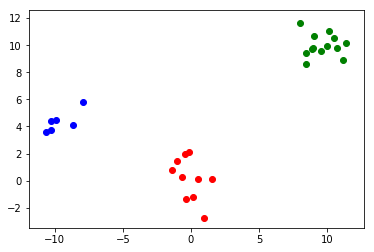

In [8]:
plot_dataset(dataset, classes)

In [9]:
def distance(p1, p2):
    distance = np.linalg.norm(p1 - p2)
    return distance

In [10]:
def vote(neighbours, num_classes):
    votes = [0 for i in range(num_classes)]
    for neigh in neighbours:
        cl = neigh[1]
        votes[cl] += 1
    voted_class = np.argmax(votes)
    return voted_class

In [15]:
def KNN(dataset, classes, num_classes, K, sample):
    num_samples = dataset.shape[0]
    num_features = dataset.shape[1]
    # List with distances from sample to dataset
    neighbours = sorted([(distance(sample, dataset[i]), classes[i], dataset[i]) for i in range(num_samples)])
    neighbours = neighbours[:K]
    voted_class = vote(neighbours, num_classes)
    return voted_class, neighbours

In [17]:
K = 3
num_classes = 3
sample = np.array([0, 6])

voted_class, neighbours = KNN(dataset, classes, num_classes, K, sample)
print(neighbours)

[(3.887033623928226, 0, array([-0.17242602,  2.11679261])), (4.024240134458333, 0, array([-0.43753228,  1.99961575])), (4.678179572617099, 0, array([-0.99403329,  1.42864769]))]


In [26]:
def plot_knn(dataset, classes, sample, voted_class, neighbours):
    colors = ["red", "blue", "green"]
    for index, point in enumerate(dataset):
        plt.scatter(point[0], point[1], color=colors[classes[index]])
    plt.scatter(sample[0], sample[1], color="yellow")
    for neigh in neighbours:
        cl = neigh[1]
        p = neigh[2]
        plt.plot((p[0], sample[0]), (p[1], sample[1]), color="cyan")
    plt.show()

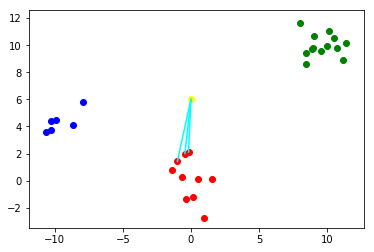

In [27]:
plot_knn(dataset, classes, sample, voted_class, neighbours)